#Preprocessing

In [ ]:
import pandas as pd
import torch
import random
import nltk
from nltk.corpus import wordnet
from transformers import MarianMTModel, MarianTokenizer

# Download NLTK resources
nltk.download("wordnet")
nltk.download("omw-1.4")

# Load MarianMT Models (EN <-> ES)
print("Loading MarianMT models for back translation...")
en_es_model = 'Helsinki-NLP/opus-mt-en-es'
es_en_model = 'Helsinki-NLP/opus-mt-es-en'

en_es_tokenizer = MarianTokenizer.from_pretrained(en_es_model)
en_es = MarianMTModel.from_pretrained(en_es_model)

es_en_tokenizer = MarianTokenizer.from_pretrained(es_en_model)
es_en = MarianMTModel.from_pretrained(es_en_model)

def back_translate(sentence):
    try:
        encoded = en_es_tokenizer([sentence], return_tensors="pt", padding=True, truncation=True, max_length=128)
        with torch.no_grad():
            translated = en_es.generate(**encoded)
        spanish = en_es_tokenizer.batch_decode(translated, skip_special_tokens=True)[0]

        encoded_back = es_en_tokenizer([spanish], return_tensors="pt", padding=True, truncation=True, max_length=128)
        with torch.no_grad():
            back_translated = es_en.generate(**encoded_back)
        english = es_en_tokenizer.batch_decode(back_translated, skip_special_tokens=True)[0]
        return english
    except Exception as e:
        print(f"Back translation failed: {e}")
        return sentence

def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random.shuffle(words)
    replaced = 0

    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            if synonym.lower() != word.lower():
                new_words = [synonym if w == word else w for w in new_words]
                replaced += 1
                if replaced >= n:
                    break
    return ' '.join(new_words)

def augment_and_save(input_csv, output_csv):
    df = pd.read_csv(input_csv)
    print(f"Loaded {len(df)} rows from {input_csv}")

    rows = []
    for index, row in df.iterrows():
        orig_utt = row['utterance']
        syn_utt = synonym_replacement(orig_utt)
        bt_utt = back_translate(orig_utt)

        base_row = row.to_dict()

        # Original
        row_orig = base_row.copy()
        row_orig['utterance'] = orig_utt
        rows.append(row_orig)

        # Synonym replaced
        row_syn = base_row.copy()
        row_syn['utterance'] = syn_utt
        rows.append(row_syn)

        # Back translated
        row_bt = base_row.copy()
        row_bt['utterance'] = bt_utt
        rows.append(row_bt)

        if index % 10 == 0:
            print(f"Processed {index+1}/{len(df)} rows")

    new_df = pd.DataFrame(rows)
    new_df.to_csv(output_csv, index=False)
    print(f"Saved augmented dataset to {output_csv}")

# Run this
augment_and_save("/content/sarcasm_data.csv", "augmented_sarcasm_data.csv")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Loading MarianMT models for back translation...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Loaded 690 rows from /content/sarcasm_data.csv


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

Processed 1/690 rows
Processed 11/690 rows
Processed 21/690 rows
Processed 31/690 rows
Processed 41/690 rows
Processed 51/690 rows
Processed 61/690 rows
Processed 71/690 rows
Processed 81/690 rows
Processed 91/690 rows
Processed 101/690 rows
Processed 111/690 rows
Processed 121/690 rows
Processed 131/690 rows
Processed 141/690 rows
Processed 151/690 rows
Processed 161/690 rows
Processed 171/690 rows
Processed 181/690 rows
Processed 191/690 rows
Processed 201/690 rows
Processed 211/690 rows
Processed 221/690 rows
Processed 231/690 rows
Processed 241/690 rows
Processed 251/690 rows
Processed 261/690 rows
Processed 271/690 rows
Processed 281/690 rows
Processed 291/690 rows
Processed 301/690 rows
Processed 311/690 rows
Processed 321/690 rows
Processed 331/690 rows
Processed 341/690 rows
Processed 351/690 rows
Processed 361/690 rows
Processed 371/690 rows
Processed 381/690 rows
Processed 391/690 rows
Processed 401/690 rows
Processed 411/690 rows
Processed 421/690 rows
Processed 431/690 rows

#DistilBERT Model based on Utterance alone

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,0.702300
20,0.685800
30,0.672600
40,0.685600
50,0.639300
60,0.585200
70,0.587800
80,0.568900
90,0.526500
100,0.378600


Test Accuracy: 0.9275362491607666

Classification Report:
               precision    recall  f1-score   support

Non-Sarcastic       0.94      0.94      0.94       233
    Sarcastic       0.92      0.92      0.92       181

     accuracy                           0.93       414
    macro avg       0.93      0.93      0.93       414
 weighted avg       0.93      0.93      0.93       414



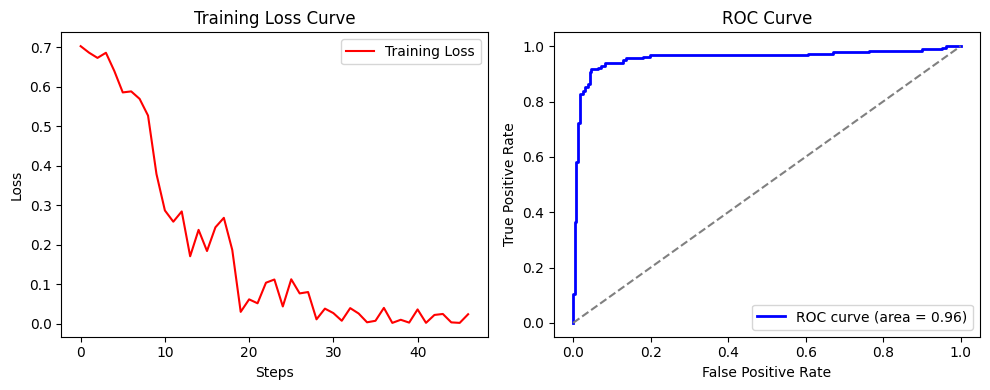

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np

# Load tokenizer and dataset
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def load_data(file_path):
    df = pd.read_csv(file_path)
    df = df[['utterance', 'sarcasm']]
    df['sarcasm'] = df['sarcasm'].astype(int)
    return df

def preprocess_data(df, tokenizer):
    encodings = tokenizer(df['utterance'].tolist(), padding=True, truncation=True, max_length=128)
    return encodings

def prepare_datasets(file_path, tokenizer):
    df = load_data(file_path)
    train_texts, test_texts, train_labels, test_labels = train_test_split(df['utterance'], df['sarcasm'], test_size=0.2, random_state=42)
    train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)

    train_encodings = preprocess_data(pd.DataFrame({'utterance': train_texts}), tokenizer)
    val_encodings = preprocess_data(pd.DataFrame({'utterance': val_texts}), tokenizer)
    test_encodings = preprocess_data(pd.DataFrame({'utterance': test_texts}), tokenizer)

    train_dataset = Dataset.from_dict({
        "input_ids": train_encodings['input_ids'],
        "attention_mask": train_encodings['attention_mask'],
        "labels": list(train_labels)
    })
    val_dataset = Dataset.from_dict({
        "input_ids": val_encodings['input_ids'],
        "attention_mask": val_encodings['attention_mask'],
        "labels": list(val_labels)
    })
    test_dataset = Dataset.from_dict({
        "input_ids": test_encodings['input_ids'],
        "attention_mask": test_encodings['attention_mask'],
        "labels": list(test_labels)
    })

    return DatasetDict({
        "train": train_dataset,
        "validation": val_dataset,
        "test": test_dataset
    }), list(test_labels)

def compute_metrics(pred):
    predictions = torch.argmax(torch.tensor(pred.predictions), dim=1)
    labels = torch.tensor(pred.label_ids)
    accuracy = (predictions == labels).float().mean().item()
    return {"accuracy": accuracy}

# Callback to track only training loss
from transformers import TrainerCallback

class LogLossCallback(TrainerCallback):
    def __init__(self):
        self.train_loss_history = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if 'loss' in logs:
            self.train_loss_history.append(logs['loss'])

    def get_train_loss_history(self):
        return self.train_loss_history

# Load dataset
datasets, true_labels = prepare_datasets("/content/augmented_sarcasm_data.csv", tokenizer)

# Load model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Training arguments (compatible with transformers 4.5.1)
training_args = TrainingArguments(
    output_dir="./results",
    do_train=True,
    do_eval=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    logging_dir="./logs",
    logging_steps=10,
    save_steps=1000,
    save_total_limit=1,
    report_to=[],
)

# Callback
log_loss_callback = LogLossCallback()

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=datasets["train"],
    eval_dataset=datasets["validation"],
    compute_metrics=compute_metrics,
    callbacks=[log_loss_callback]
)

# Train
trainer.train()

# Evaluate on test set
test_results = trainer.evaluate(datasets["test"])
print("Test Accuracy:", test_results["eval_accuracy"])

# Predictions and classification report
predictions = trainer.predict(datasets["test"])
pred_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1).tolist()

print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=["Non-Sarcastic", "Sarcastic"]))

# Plot training loss and ROC curve only
plt.figure(figsize=(10, 4))

# Training loss
plt.subplot(1, 2, 1)
plt.plot(log_loss_callback.get_train_loss_history(), label="Training Loss", color='red')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predictions.predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


#Model based on Utterance and Context

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,0.705200
20,0.686200
30,0.650500
40,0.627500
50,0.563500
60,0.492000
70,0.500800
80,0.566400
90,0.467500
100,0.372300


Test Accuracy: 0.9589372277259827

Classification Report:
               precision    recall  f1-score   support

Non-Sarcastic       0.96      0.97      0.96       233
    Sarcastic       0.96      0.95      0.95       181

     accuracy                           0.96       414
    macro avg       0.96      0.96      0.96       414
 weighted avg       0.96      0.96      0.96       414



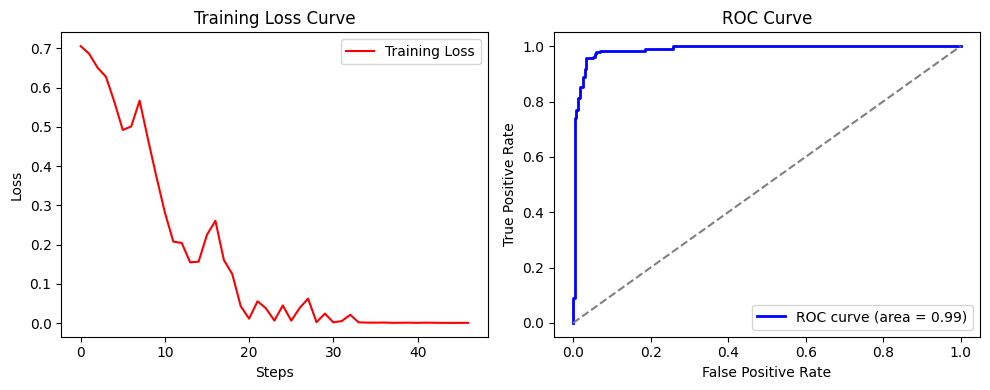

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np

# Load tokenizer and dataset
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def load_data(file_path):
    df = pd.read_csv(file_path)
    df = df[['context', 'utterance', 'sarcasm']]
    df['sarcasm'] = df['sarcasm'].astype(int)
    return df

def preprocess_data(df, tokenizer):
    # Combine context and utterance using [SEP] token
    combined = df.apply(lambda x: f"{x['context']} {tokenizer.sep_token} {x['utterance']}", axis=1).tolist()
    encodings = tokenizer(combined, padding=True, truncation=True, max_length=128)
    return encodings

def prepare_datasets(file_path, tokenizer):
    df = load_data(file_path)
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

    train_encodings = preprocess_data(train_df, tokenizer)
    val_encodings = preprocess_data(val_df, tokenizer)
    test_encodings = preprocess_data(test_df, tokenizer)

    train_dataset = Dataset.from_dict({
        "input_ids": train_encodings['input_ids'],
        "attention_mask": train_encodings['attention_mask'],
        "labels": train_df['sarcasm'].tolist()
    })
    val_dataset = Dataset.from_dict({
        "input_ids": val_encodings['input_ids'],
        "attention_mask": val_encodings['attention_mask'],
        "labels": val_df['sarcasm'].tolist()
    })
    test_dataset = Dataset.from_dict({
        "input_ids": test_encodings['input_ids'],
        "attention_mask": test_encodings['attention_mask'],
        "labels": test_df['sarcasm'].tolist()
    })

    return DatasetDict({
        "train": train_dataset,
        "validation": val_dataset,
        "test": test_dataset
    }), test_df['sarcasm'].tolist()

def compute_metrics(pred):
    predictions = torch.argmax(torch.tensor(pred.predictions), dim=1)
    labels = torch.tensor(pred.label_ids)
    accuracy = (predictions == labels).float().mean().item()
    return {"accuracy": accuracy}

# Callback to track only training loss
from transformers import TrainerCallback

class LogLossCallback(TrainerCallback):
    def __init__(self):
        self.train_loss_history = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if 'loss' in logs:
            self.train_loss_history.append(logs['loss'])

    def get_train_loss_history(self):
        return self.train_loss_history

# Load dataset
datasets, true_labels = prepare_datasets("/content/augmented_sarcasm_data.csv", tokenizer)

# Load model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    do_train=True,
    do_eval=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    logging_dir="./logs",
    logging_steps=10,
    save_steps=1000,
    save_total_limit=1,
    report_to=[],
)

# Callback
log_loss_callback = LogLossCallback()

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=datasets["train"],
    eval_dataset=datasets["validation"],
    compute_metrics=compute_metrics,
    callbacks=[log_loss_callback]
)

# Train
trainer.train()

# Evaluate on test set
test_results = trainer.evaluate(datasets["test"])
print("Test Accuracy:", test_results["eval_accuracy"])

# Predictions and classification report
predictions = trainer.predict(datasets["test"])
pred_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1).tolist()

print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=["Non-Sarcastic", "Sarcastic"]))

# Plot training loss and ROC curve only
plt.figure(figsize=(10, 4))

# Training loss
plt.subplot(1, 2, 1)
plt.plot(log_loss_callback.get_train_loss_history(), label="Training Loss", color='red')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predictions.predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


#Model Based on Context and Utterane Embedded with Speakers

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,0.695500
20,0.659700
30,0.614100
40,0.647200
50,0.531400
60,0.455700
70,0.477600
80,0.544000
90,0.485100
100,0.343700


Test Accuracy: 0.9637681245803833

Classification Report:
               precision    recall  f1-score   support

Non-Sarcastic       0.95      0.98      0.97       233
    Sarcastic       0.98      0.94      0.96       181

     accuracy                           0.96       414
    macro avg       0.97      0.96      0.96       414
 weighted avg       0.96      0.96      0.96       414



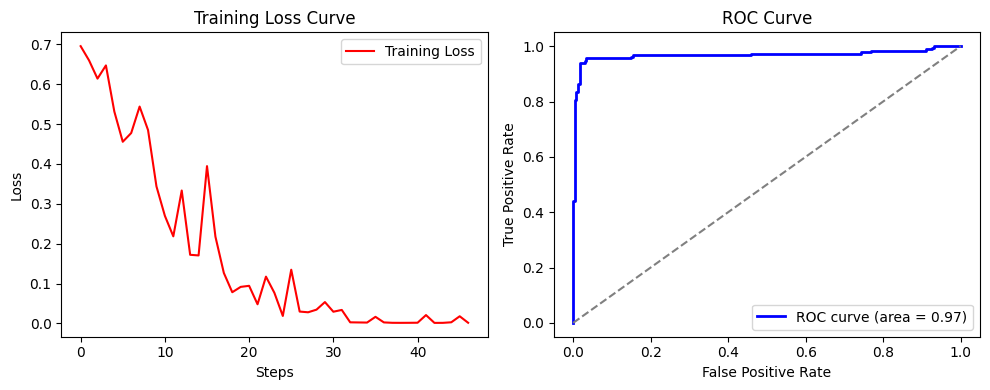

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import ast

# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Load and filter dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    df = df[['context_mapping', 'utterance', 'speaker', 'sarcasm']]
    df['sarcasm'] = df['sarcasm'].astype(int)
    return df

# Preprocess the data: context + [SEP] + speaker: utterance
def preprocess_data(df, tokenizer):
    sep = tokenizer.sep_token

    def flatten_context(context_mapping_str):
        try:
            context_list = ast.literal_eval(context_mapping_str)
            return " ".join(
                f"{item.get('speaker', '')}: {item.get('utterance', '')}"
                for item in context_list
            )
        except Exception:
            return ""

    combined = df.apply(
        lambda x: f"{flatten_context(x['context_mapping'])} {sep} {x['speaker']}: {x['utterance']}",
        axis=1
    ).tolist()

    encodings = tokenizer(combined, padding=True, truncation=True, max_length=128)
    return encodings

# Prepare train/val/test splits
def prepare_datasets(file_path, tokenizer):
    df = load_data(file_path)
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

    train_encodings = preprocess_data(train_df, tokenizer)
    val_encodings = preprocess_data(val_df, tokenizer)
    test_encodings = preprocess_data(test_df, tokenizer)

    train_dataset = Dataset.from_dict({
        "input_ids": train_encodings['input_ids'],
        "attention_mask": train_encodings['attention_mask'],
        "labels": train_df['sarcasm'].tolist()
    })
    val_dataset = Dataset.from_dict({
        "input_ids": val_encodings['input_ids'],
        "attention_mask": val_encodings['attention_mask'],
        "labels": val_df['sarcasm'].tolist()
    })
    test_dataset = Dataset.from_dict({
        "input_ids": test_encodings['input_ids'],
        "attention_mask": test_encodings['attention_mask'],
        "labels": test_df['sarcasm'].tolist()
    })

    return DatasetDict({
        "train": train_dataset,
        "validation": val_dataset,
        "test": test_dataset
    }), test_df['sarcasm'].tolist()

# Accuracy metric
def compute_metrics(pred):
    predictions = torch.argmax(torch.tensor(pred.predictions), dim=1)
    labels = torch.tensor(pred.label_ids)
    accuracy = (predictions == labels).float().mean().item()
    return {"accuracy": accuracy}

# Callback to track training loss
class LogLossCallback(TrainerCallback):
    def __init__(self):
        self.train_loss_history = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if 'loss' in logs:
            self.train_loss_history.append(logs['loss'])

    def get_train_loss_history(self):
        return self.train_loss_history

# Load dataset
datasets, true_labels = prepare_datasets("/content/augmented_sarcasm_data.csv", tokenizer)

# Load model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    do_train=True,
    do_eval=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    logging_dir="./logs",
    logging_steps=10,
    save_steps=1000,
    save_total_limit=1,
    report_to=[],
)

# Initialize trainer
log_loss_callback = LogLossCallback()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=datasets["train"],
    eval_dataset=datasets["validation"],
    compute_metrics=compute_metrics,
    callbacks=[log_loss_callback]
)

# Train model
trainer.train()

# Evaluate
test_results = trainer.evaluate(datasets["test"])
print("Test Accuracy:", test_results["eval_accuracy"])

# Predictions & metrics
predictions = trainer.predict(datasets["test"])
pred_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1).tolist()

print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=["Non-Sarcastic", "Sarcastic"]))

# Plotting
plt.figure(figsize=(10, 4))

# Training loss plot
plt.subplot(1, 2, 1)
plt.plot(log_loss_callback.get_train_loss_history(), label="Training Loss", color='red')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

# ROC curve plot
fpr, tpr, _ = roc_curve(true_labels, predictions.predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


#Model Based on Summarized Context

/tmp/ipython-input-1484261308.py:197: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp)
Epoch 1/15:   0%|          | 0/69 [00:00<?, ?it/s]/tmp/ipython-input-1484261308.py:248: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 1/15: 100%|██████████| 69/69 [00:08<00:00,  8.30it/s, loss=0.6827]



Epoch 1: train_loss=0.6827 | val_acc=0.7126 | val_f1=0.7125 | val_auc=0.7946
  ✓ New best F1. Model saved to best_sarcasm.ckpt


Epoch 2/15:   0%|          | 0/69 [00:00<?, ?it/s]/tmp/ipython-input-1484261308.py:248: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 2/15: 100%|██████████| 69/69 [00:08<00:00,  8.39it/s, loss=0.4998]



Epoch 2: train_loss=0.4998 | val_acc=0.8213 | val_f1=0.8197 | val_auc=0.8996
  ✓ New best F1. Model saved to best_sarcasm.ckpt


Epoch 3/15:   0%|          | 0/69 [00:00<?, ?it/s]/tmp/ipython-input-1484261308.py:248: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 3/15: 100%|██████████| 69/69 [00:08<00:00,  8.41it/s, loss=0.2516]



Epoch 3: train_loss=0.2516 | val_acc=0.9179 | val_f1=0.9177 | val_auc=0.9774
  ✓ New best F1. Model saved to best_sarcasm.ckpt


Epoch 4/15:   0%|          | 0/69 [00:00<?, ?it/s]/tmp/ipython-input-1484261308.py:248: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 4/15: 100%|██████████| 69/69 [00:08<00:00,  8.28it/s, loss=0.0806]



Epoch 4: train_loss=0.0806 | val_acc=0.9565 | val_f1=0.9565 | val_auc=0.9954
  ✓ New best F1. Model saved to best_sarcasm.ckpt


Epoch 5/15:   0%|          | 0/69 [00:00<?, ?it/s]/tmp/ipython-input-1484261308.py:248: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 5/15: 100%|██████████| 69/69 [00:08<00:00,  8.22it/s, loss=0.0086]



Epoch 5: train_loss=0.0086 | val_acc=0.9614 | val_f1=0.9613 | val_auc=0.9975
  ✓ New best F1. Model saved to best_sarcasm.ckpt


Epoch 6/15:   0%|          | 0/69 [00:00<?, ?it/s]/tmp/ipython-input-1484261308.py:248: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 6/15: 100%|██████████| 69/69 [00:08<00:00,  8.13it/s, loss=0.0016]



Epoch 6: train_loss=0.0016 | val_acc=0.9758 | val_f1=0.9758 | val_auc=0.9978
  ✓ New best F1. Model saved to best_sarcasm.ckpt


Epoch 7/15:   0%|          | 0/69 [00:00<?, ?it/s]/tmp/ipython-input-1484261308.py:248: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 7/15: 100%|██████████| 69/69 [00:08<00:00,  8.09it/s, loss=0.0004]



Epoch 7: train_loss=0.0004 | val_acc=0.9758 | val_f1=0.9758 | val_auc=0.9975


Epoch 8/15:   0%|          | 0/69 [00:00<?, ?it/s]/tmp/ipython-input-1484261308.py:248: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 8/15: 100%|██████████| 69/69 [00:08<00:00,  8.08it/s, loss=0.0006]



Epoch 8: train_loss=0.0006 | val_acc=0.9831 | val_f1=0.9831 | val_auc=0.9976
  ✓ New best F1. Model saved to best_sarcasm.ckpt


Epoch 9/15:   0%|          | 0/69 [00:00<?, ?it/s]/tmp/ipython-input-1484261308.py:248: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 9/15: 100%|██████████| 69/69 [00:08<00:00,  8.15it/s, loss=0.0004]



Epoch 9: train_loss=0.0004 | val_acc=0.9734 | val_f1=0.9734 | val_auc=0.9980


Epoch 10/15:   0%|          | 0/69 [00:00<?, ?it/s]/tmp/ipython-input-1484261308.py:248: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 10/15: 100%|██████████| 69/69 [00:08<00:00,  8.10it/s, loss=0.0001]



Epoch 10: train_loss=0.0001 | val_acc=0.9734 | val_f1=0.9734 | val_auc=0.9979


Epoch 11/15:   0%|          | 0/69 [00:00<?, ?it/s]/tmp/ipython-input-1484261308.py:248: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):
Epoch 11/15: 100%|██████████| 69/69 [00:08<00:00,  8.08it/s, loss=0.0001]



Epoch 11: train_loss=0.0001 | val_acc=0.9734 | val_f1=0.9734 | val_auc=0.9979
  Early stopping triggered.

Best checkpoint metrics:
Accuracy: 0.9831 | Macro-F1: 0.9831 | ROC-AUC: 0.9976

Classification report:
               precision    recall  f1-score   support

           0     0.9808    0.9855    0.9831       207
           1     0.9854    0.9807    0.9831       207

    accuracy                         0.9831       414
   macro avg     0.9831    0.9831    0.9831       414
weighted avg     0.9831    0.9831    0.9831       414


Best checkpoint metrics:
Accuracy: 0.9831 | Macro-F1: 0.9831 | ROC-AUC: 0.9976

Classification report:
               precision    recall  f1-score   support

           0     0.9808    0.9855    0.9831       207
           1     0.9854    0.9807    0.9831       207

    accuracy                         0.9831       414
   macro avg     0.9831    0.9831    0.9831       414
weighted avg     0.9831    0.9831    0.9831       414



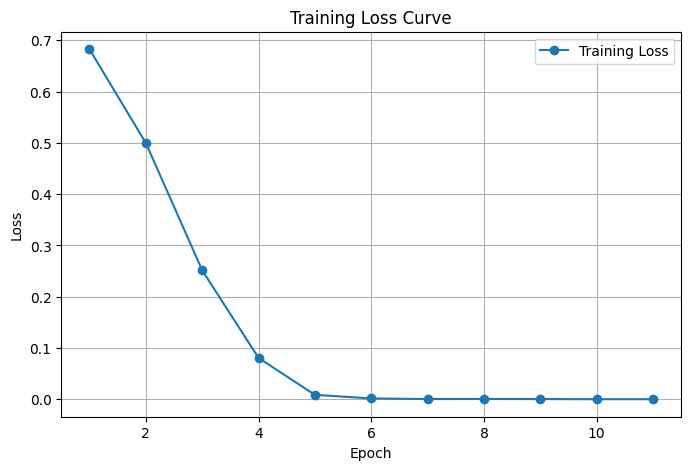

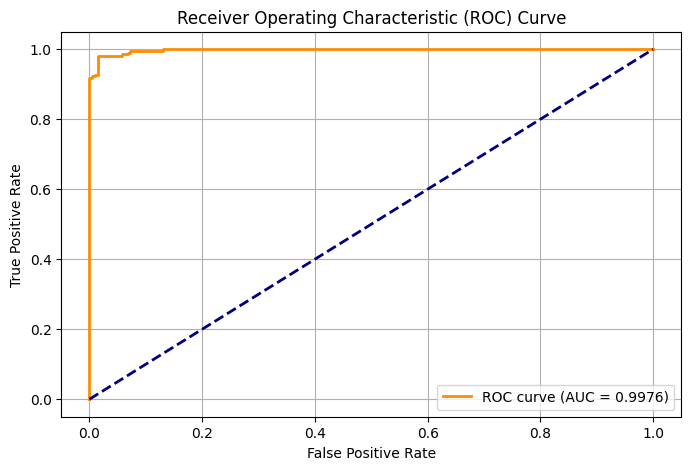

In [3]:
import os
import random
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertModel, get_scheduler
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from torch import nn
from torch.nn.functional import softmax
from tqdm import tqdm

# -----------------------
# Reproducibility
# -----------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# -----------------------
# Device & AMP
# -----------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
use_amp = torch.cuda.is_available()

# -----------------------
# Load Dataset
# -----------------------
df = pd.read_csv("augmented_sarcasm_data.csv")
required_columns = {'utterance', 'summary', 'speaker', 'sarcasm'}
assert required_columns.issubset(df.columns), "Missing required columns."

# Clean tiny artifacts (optional but helps)
for col in ['utterance', 'summary']:
    df[col] = df[col].astype(str).str.strip().replace({"": "[EMPTY]"})

# -----------------------
# Speaker Map
# -----------------------
unique_speakers = df['speaker'].astype(str).unique()
speaker_map = {speaker: idx for idx, speaker in enumerate(unique_speakers)}

# -----------------------
# Stratified Split
# -----------------------
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    random_state=SEED,
    stratify=df['sarcasm']
)

# -----------------------
# Tokenizer
# -----------------------
MODEL_NAME = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)

class SarcasmDataset(Dataset):
    def __init__(self, data, tokenizer, speaker_map, max_len=196):
        self.data = data.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.speaker_map = speaker_map
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        utterance = str(row['utterance'])
        summary = str(row['summary'])

        enc = self.tokenizer(
            utterance,
            summary,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        speaker_id = self.speaker_map[str(row['speaker'])]
        label = int(row['sarcasm'])

        return {
            'input_ids': enc['input_ids'].squeeze(0),
            'attention_mask': enc['attention_mask'].squeeze(0),
            'speaker_id': torch.tensor(speaker_id, dtype=torch.long),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_dataset = SarcasmDataset(train_df, tokenizer, speaker_map)
val_dataset   = SarcasmDataset(val_df, tokenizer, speaker_map)

# Slightly larger batch can help stability if you use AMP + grad accumulation
BATCH_SIZE = 24 if torch.cuda.is_available() else 8
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

# -----------------------
# Model
# -----------------------
class MeanPooling(nn.Module):
    """Mask-aware mean pooling over token embeddings."""
    def __init__(self):
        super().__init__()
    def forward(self, last_hidden_state, attention_mask):
        mask = attention_mask.unsqueeze(-1).type_as(last_hidden_state)  # (B, T, 1)
        summed = (last_hidden_state * mask).sum(dim=1)
        denom = mask.sum(dim=1).clamp(min=1e-6)
        return summed / denom

class SarcasmDetectionModel(nn.Module):
    def __init__(self, num_labels, speaker_vocab_size, speaker_embedding_dim=64, dropout=0.2):
        super().__init__()
        self.bert = DistilBertModel.from_pretrained(MODEL_NAME)
        self.pooler = MeanPooling()

        # Speaker embedding branch
        self.speaker_embedding = nn.Embedding(speaker_vocab_size, speaker_embedding_dim)
        self.speaker_ln = nn.LayerNorm(speaker_embedding_dim)

        hidden = self.bert.config.hidden_size

        # Fusion MLP
        self.fusion = nn.Sequential(
            nn.Linear(hidden + speaker_embedding_dim, hidden),
            nn.GELU(),
            nn.LayerNorm(hidden),
            nn.Dropout(dropout),
        )
        self.classifier = nn.Linear(hidden, num_labels)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, attention_mask, speaker_ids):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        # DistilBERT has no pooler_output — use mean pooling over masked tokens
        text_vec = self.pooler(out.last_hidden_state, attention_mask)
        text_vec = self.dropout(text_vec)

        spk = self.speaker_embedding(speaker_ids)
        spk = self.speaker_ln(spk)

        fused = torch.cat([text_vec, spk], dim=1)
        fused = self.fusion(fused)
        logits = self.classifier(fused)
        return logits

model = SarcasmDetectionModel(
    num_labels=2,
    speaker_vocab_size=len(speaker_map),
    speaker_embedding_dim=64,
    dropout=0.25
).to(device)

# -----------------------
# Optimizer, Class Weights, Scheduler
# -----------------------
# Class weights help with imbalance
class_counts = train_df['sarcasm'].value_counts().sort_index().values
class_weights = torch.tensor((class_counts.sum() / np.maximum(class_counts, 1)), dtype=torch.float32)
class_weights = class_weights / class_weights.mean()  # normalize
class_weights = class_weights.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)

# Weight decay only on non-bias/LayerNorm
decay, no_decay = [], []
for n, p in model.named_parameters():
    if any(nd in n for nd in ["bias", "LayerNorm.weight", "LayerNorm.bias"]):
        no_decay.append(p)
    else:
        decay.append(p)
optimizer = torch.optim.AdamW(
    [{"params": decay, "weight_decay": 0.01},
     {"params": no_decay, "weight_decay": 0.0}],
    lr=3e-5
)

EPOCHS = 15
GRAD_ACCUM_STEPS = 2  # simulate larger batch
num_update_steps_per_epoch = int(np.ceil(len(train_loader) / GRAD_ACCUM_STEPS))
num_training_steps = EPOCHS * num_update_steps_per_epoch
warmup_steps = int(0.06 * num_training_steps)

scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=num_training_steps
)

scaler = torch.cuda.amp.GradScaler(enabled=use_amp)

# -----------------------
# Training & Evaluation
# -----------------------
best_f1 = -1.0
patience = 3
bad_epochs = 0
save_path = "best_sarcasm.ckpt"

def evaluate(model, data_loader):
    model.eval()
    all_preds, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device, non_blocking=True)
            attention_mask = batch['attention_mask'].to(device, non_blocking=True)
            speaker_ids = batch['speaker_id'].to(device, non_blocking=True)
            labels = batch['labels'].to(device, non_blocking=True)

            logits = model(input_ids, attention_mask, speaker_ids)
            probs = softmax(logits, dim=1)
            preds = probs.argmax(dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs[:, 1].detach().cpu().numpy())
    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average="macro")
    try:
        fpr, tpr, _ = roc_curve(all_labels, all_probs)
        roc_auc = auc(fpr, tpr)
    except Exception:
        roc_auc = float('nan')
    return acc, f1, roc_auc, np.array(all_labels), np.array(all_preds)

train_losses = []
global_step = 0

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    optimizer.zero_grad(set_to_none=True)

    pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS}")
    for step, batch in enumerate(pbar, start=1):
        input_ids = batch['input_ids'].to(device, non_blocking=True)
        attention_mask = batch['attention_mask'].to(device, non_blocking=True)
        speaker_ids = batch['speaker_id'].to(device, non_blocking=True)
        labels = batch['labels'].to(device, non_blocking=True)

        with torch.cuda.amp.autocast(enabled=use_amp):
            logits = model(input_ids, attention_mask, speaker_ids)
            loss = criterion(logits, labels) / GRAD_ACCUM_STEPS

        scaler.scale(loss).backward()

        if step % GRAD_ACCUM_STEPS == 0:
            # Gradient clipping
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad(set_to_none=True)
            scheduler.step()
            global_step += 1

        total_loss += loss.item() * GRAD_ACCUM_STEPS
        pbar.set_postfix(loss=f"{(total_loss/step):.4f}")

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    val_acc, val_f1, val_auc, y_true, y_pred = evaluate(model, val_loader)
    print(f"\nEpoch {epoch}: train_loss={avg_train_loss:.4f} | val_acc={val_acc:.4f} | val_f1={val_f1:.4f} | val_auc={val_auc:.4f}")

    # Early stopping on F1
    if val_f1 > best_f1 + 1e-4:
        best_f1 = val_f1
        bad_epochs = 0
        torch.save({"model_state": model.state_dict(),
                    "speaker_map": speaker_map,
                    "tokenizer": MODEL_NAME}, save_path)
        print(f"  ✓ New best F1. Model saved to {save_path}")
    else:
        bad_epochs += 1
        if bad_epochs >= patience:
            print("  Early stopping triggered.")
            break

# -----------------------
# Load best and final report
# -----------------------
ckpt = torch.load(save_path, map_location=device)
model.load_state_dict(ckpt["model_state"])

val_acc, val_f1, val_auc, y_true, y_pred = evaluate(model, val_loader)
print("\nBest checkpoint metrics:")
print(f"Accuracy: {val_acc:.4f} | Macro-F1: {val_f1:.4f} | ROC-AUC: {val_auc:.4f}")
print("\nClassification report:\n", classification_report(y_true, y_pred, digits=4))

import matplotlib.pyplot as plt

# -----------------------
# Load best and final report
# -----------------------
ckpt = torch.load(save_path, map_location=device)
model.load_state_dict(ckpt["model_state"])

val_acc, val_f1, val_auc, y_true, y_pred = evaluate(model, val_loader)
print("\nBest checkpoint metrics:")
print(f"Accuracy: {val_acc:.4f} | Macro-F1: {val_f1:.4f} | ROC-AUC: {val_auc:.4f}")
print("\nClassification report:\n", classification_report(y_true, y_pred, digits=4))

# -----------------------
# Plot Training Loss Curve
# -----------------------
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.legend()
plt.show()

# -----------------------
# ROC Curve (best checkpoint)
# -----------------------
from sklearn.metrics import roc_curve, auc

# Get probabilities again for ROC
model.eval()
all_probs, all_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        speaker_ids = batch['speaker_id'].to(device)
        labels = batch['labels'].to(device)

        logits = model(input_ids, attention_mask, speaker_ids)
        probs = softmax(logits, dim=1)
        all_probs.extend(probs[:, 1].cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

